# **Import packeges**

In [260]:
import numpy as np # handling multi-dimensional arrays and matrices
import pandas as pd # handling dataframes
from matplotlib import pyplot as plt # visualization for 2D and 3D plots
import seaborn as sns # based on matplotlib, for statistical graphics
from sklearn.preprocessing import LabelEncoder # function to encode categorical features
from sklearn.manifold import MDS # function to visualizes the similarity or dissimilarity between data points in a lower-dimensional space
from sklearn.preprocessing import MinMaxScaler # function to scale features

# **Preprocessing**
"Before analysis, the dataset underwent several preprocessing steps:
- Missing values were detected, and removed.
- General analysis.
- Specific analysis for Harry potter books.
- Encode categorical features.
- Correlataion was determined in both textual, and visual way using a heatmap.
- Relationships between multiple variables were explored simultaneously using pair plots, scatter plot matrices, and multidimensional scaling (MDS).
- Outliers were detected and treated using the Interquartile Range (IQR) method.
- Numeric features were scaled using MinMaxScaler to ensure uniformity of scale for modeling."

In [261]:
# books dataset sourced from kaggle
books = pd.read_csv("best-selling-books.csv")
print(books.shape) #print number of rows,columns in dataset
print(books.columns)

(174, 6)
Index(['Book', 'Author(s)', 'Original language', 'First published',
       'Approximate sales in millions', 'Genre'],
      dtype='object')


In [262]:
#show sample of dataset
books.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


In [263]:
books.info()
'''
we can observe from the output if there are null values
and alse we can see types of each column, memory usage of the dataset, and its shape
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


'\nwe can observe from the output if there are null values\nand alse we can see types of each column, memory usage of the dataset, and its shape\n'

 Missing values

In [264]:
# summation of null values at each column in the dataset
books.isnull().sum()

Book                              0
Author(s)                         0
Original language                 0
First published                   0
Approximate sales in millions     0
Genre                            56
dtype: int64

In [265]:
# drop null values
books.dropna(inplace=True)

In [266]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           118 non-null    object 
 1   Author(s)                      118 non-null    object 
 2   Original language              118 non-null    object 
 3   First published                118 non-null    int64  
 4   Approximate sales in millions  118 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.5+ KB


General Analysis

In [267]:
# describe function Summarize Statistics for Numerical data to recognize the nature of our dataset, and to see if there are outliers
books.describe()

,First published,Approximate sales in millions
count,118.000000,118.000000
mean,1961.483051,38.765254
std,44.992636,30.295672
min,1788.000000,10.400000
25%,1945.000000,20.000000
50%,1971.000000,30.000000
75%,1992.750000,50.000000
max,2018.000000,200.000000


In [268]:
# Summary Statistics for Categorical data
books.describe(exclude=[np.number])

,Book,Author(s),Original language,Genre
count,118,118,118,118
unique,118,104,14,80
top,A Tale of Two Cities,J. K. Rowling,English,Fantasy
freq,1,7,92,10


Harry potter books analysis

In [269]:
# Filter the dataset for books in the Harry Potter series
harry_potter_books = books[books['Book'].str.contains('Harry Potter', case=False)]

# Sort the filtered dataset by approximate sales in millions
most_selling_harry_potter_books = harry_potter_books.sort_values(by='Approximate sales in millions', ascending=False)

# Display the most selling Harry Potter books
print(most_selling_harry_potter_books[['Book', 'Approximate sales in millions']])

                                         Book  Approximate sales in millions
2    Harry Potter and the Philosopher's Stone                          120.0
10    Harry Potter and the Chamber of Secrets                           77.0
11   Harry Potter and the Prisoner of Azkaban                           65.0
12        Harry Potter and the Goblet of Fire                           65.0
13  Harry Potter and the Order of the Phoenix                           65.0
14     Harry Potter and the Half-Blood Prince                           65.0
15       Harry Potter and the Deathly Hallows                           65.0


In [270]:
# Calculate the average sales (popularity) of the Harry Potter books
average_sales_harry_potter = harry_potter_books['Approximate sales in millions'].mean()

# Display the average sales (popularity) of the Harry Potter books
print("Average approximate sales in millions of Harry Potter books:", average_sales_harry_potter)

Average approximate sales in millions of Harry Potter books: 74.57142857142857


In [271]:
# Count the number of unique Harry Potter books in the 'Book' column
unique_harry_potter_books_count = harry_potter_books['Book'].value_counts()

# Display the count of unique Harry Potter books
print("Count of unique Harry Potter books:", unique_harry_potter_books_count)

Count of unique Harry Potter books: Book
Harry Potter and the Philosopher's Stone     1
Harry Potter and the Chamber of Secrets      1
Harry Potter and the Prisoner of Azkaban     1
Harry Potter and the Goblet of Fire          1
Harry Potter and the Order of the Phoenix    1
Harry Potter and the Half-Blood Prince       1
Harry Potter and the Deathly Hallows         1
Name: count, dtype: int64


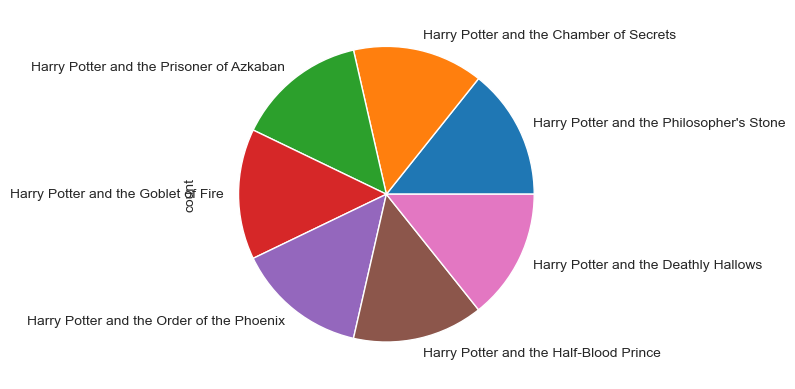

In [272]:
# plot the count of unique Harry Potter books
unique_harry_potter_books_count.plot(kind='pie');

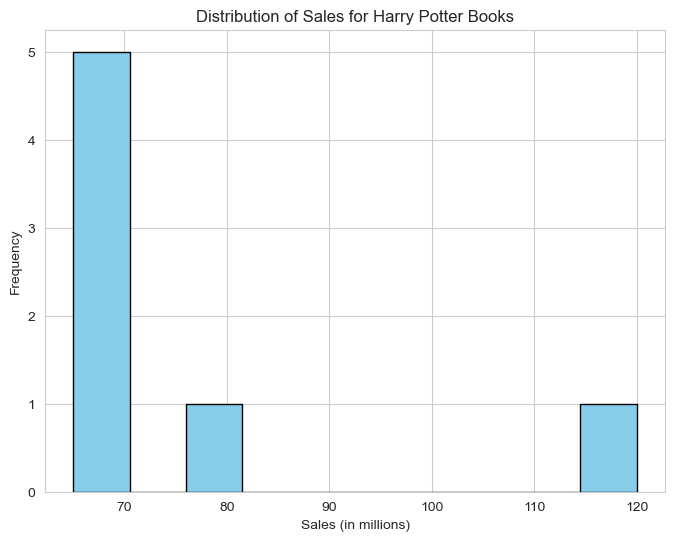

In [273]:
# Plot histogram of sales for Harry Potter books
plt.figure(figsize=(8, 6))
plt.hist(harry_potter_books['Approximate sales in millions'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sales (in millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Sales for Harry Potter Books')
plt.grid(True)
plt.show()

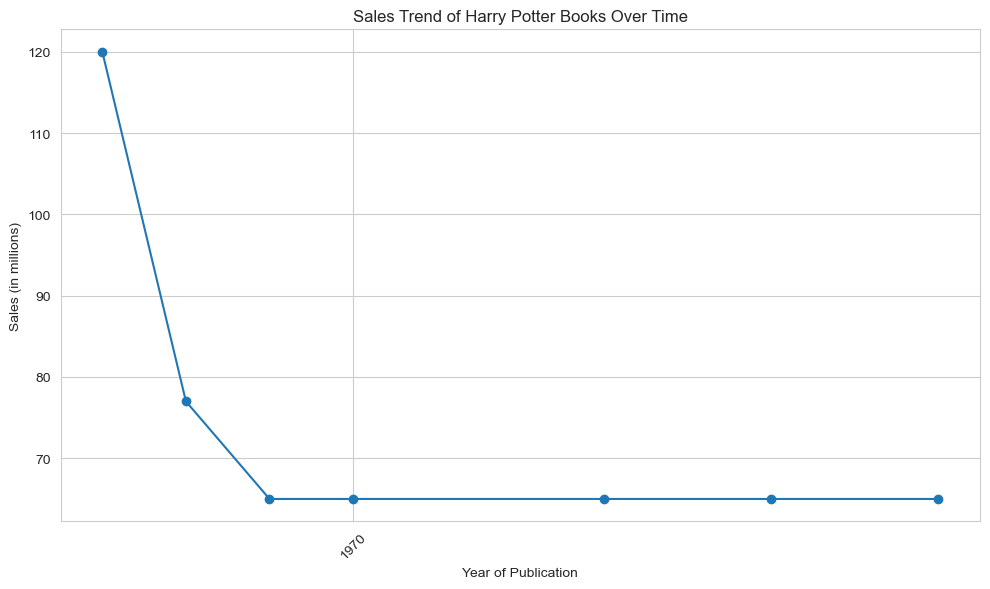

In [274]:
# analyze the sales trend over time by plotting sales against the 'First published' year
# convert 'First published' column to datetime
harry_potter_books['First published'] = pd.to_datetime(harry_potter_books['First published'])

# plot sales trend over time
plt.figure(figsize=(10, 6))
plt.plot(harry_potter_books['First published'], harry_potter_books['Approximate sales in millions'], marker='o', linestyle='-')
plt.xlabel('Year of Publication')
plt.ylabel('Sales (in millions)')
plt.title('Sales Trend of Harry Potter Books Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

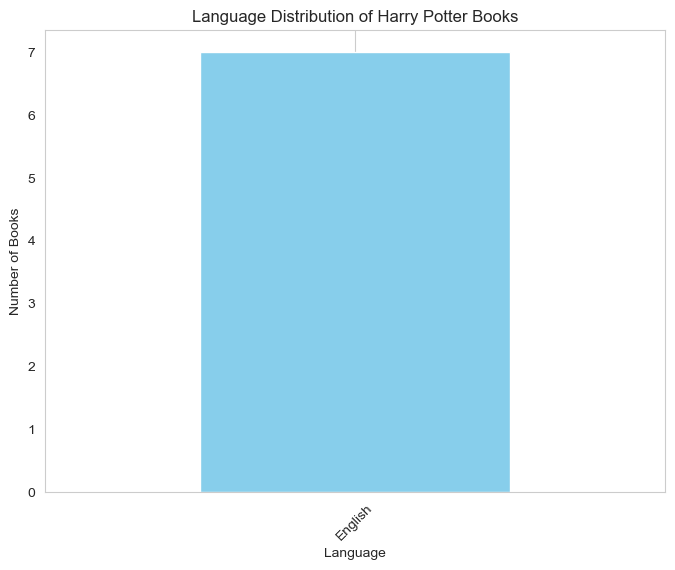

In [275]:
# examine the distribution of languages in which the Harry Potter books were published
# count of books published in each language
language_distribution = harry_potter_books['Original language'].value_counts()

# plot language distribution
plt.figure(figsize=(8, 6))
language_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.title('Language Distribution of Harry Potter Books')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

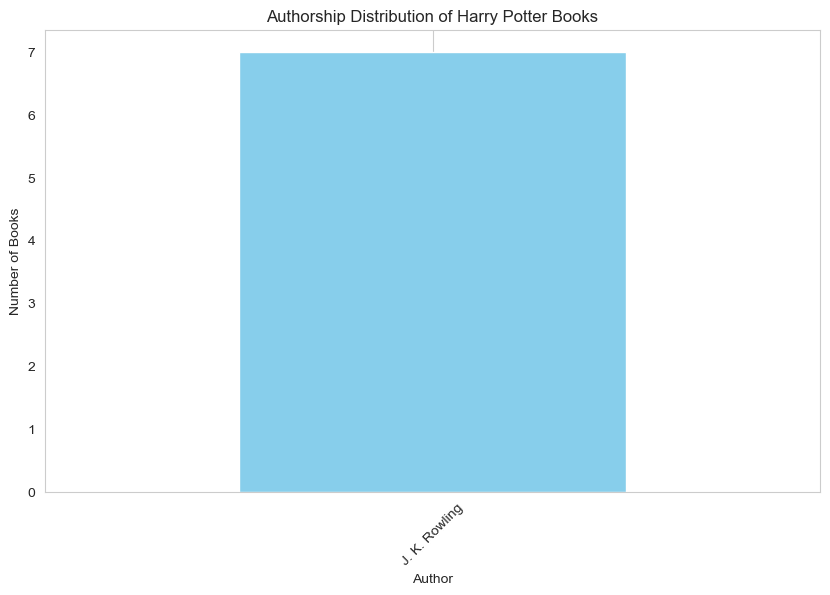

In [276]:
# explore the authorship of the Harry Potter books and see if there are multiple authors
# count of books by each author
author_distribution = harry_potter_books['Author(s)'].value_counts()

# plot author distribution
plt.figure(figsize=(10, 6))
author_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Authorship Distribution of Harry Potter Books')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

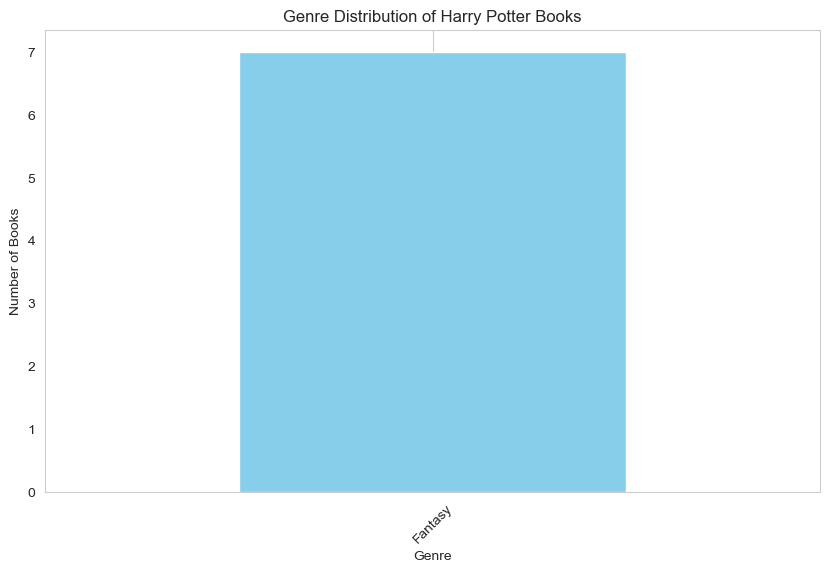

In [277]:
# analyze the genres of the Harry Potter books to see if they fall into specific categories
# Count of books in each genre
genre_distribution = harry_potter_books['Genre'].value_counts()

# Plot genre distribution
plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Genre Distribution of Harry Potter Books')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Encode categorical columns

In [278]:
# List of categorical columns
categorical_columns = ['Book', 'Author(s)', 'Original language', 'Genre']

# Apply Label Encoding to each categorical column separately
for col in categorical_columns:
    LE = LabelEncoder()
    books[col] = LE.fit_transform(books[col])

# Display the encoded dataset
books.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,2,15,3,1859,200.0,31
1,84,5,4,1943,200.0,47
2,33,41,3,1997,120.0,25
3,7,0,3,1939,100.0,41
4,19,12,0,1791,100.0,24


Correlation and relationships

In [279]:
'''calculate correlation_matrix which is a matrix or a data structure
that contains correlations between  between numerical columns and 'Approximate sales in millions' '''
correlation_matrix = books.corr()

# sort correlations with 'target' in descending order
correlation_with_Approximate_sales_in_millions = correlation_matrix['Approximate sales in millions'].sort_values(ascending=False)

# display correlations with 'target'
print(correlation_with_Approximate_sales_in_millions)

Approximate sales in millions    1.000000
Original language               -0.063722
Book                            -0.128232
Genre                           -0.141922
First published                 -0.222704
Author(s)                       -0.272719
Name: Approximate sales in millions, dtype: float64


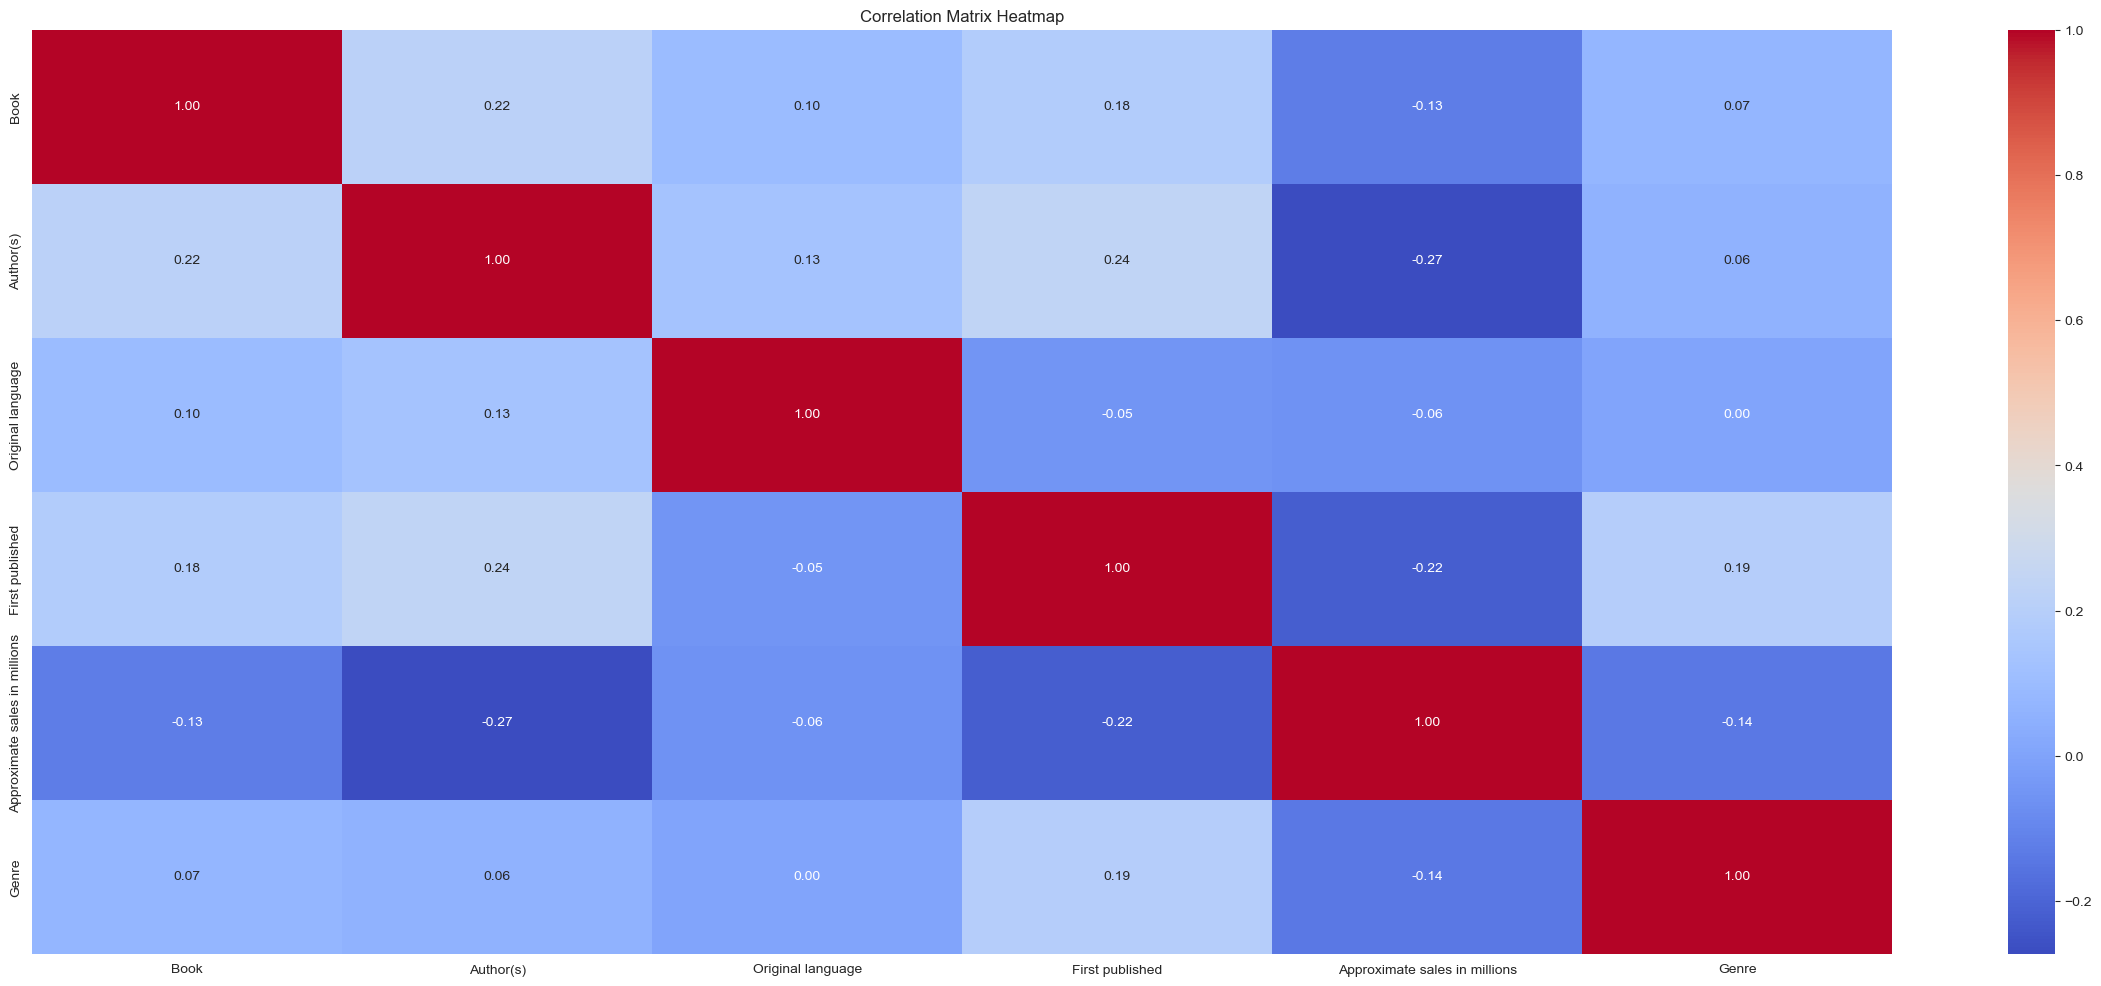

In [280]:
'''heatmap visualization: each cell's color represents
the strength and direction of correlation between the variables.
Positive correlations --> represented by warmer colors,
negative correlations --> by cooler colors,
and the intensity of the color signifies the magnitude of the correlation.
The annotations within the cells will show the actual correlation values'''

# plotting the heatmap
plt.figure(figsize=(30, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# annot=True: This parameter specifies whether to annotate the heatmap with the numeric values or not.
# fmt=".2f": This parameter specifies the format of the annotations (.2f stands for two decimal places)

plt.title('Correlation Matrix Heatmap')
plt.show()

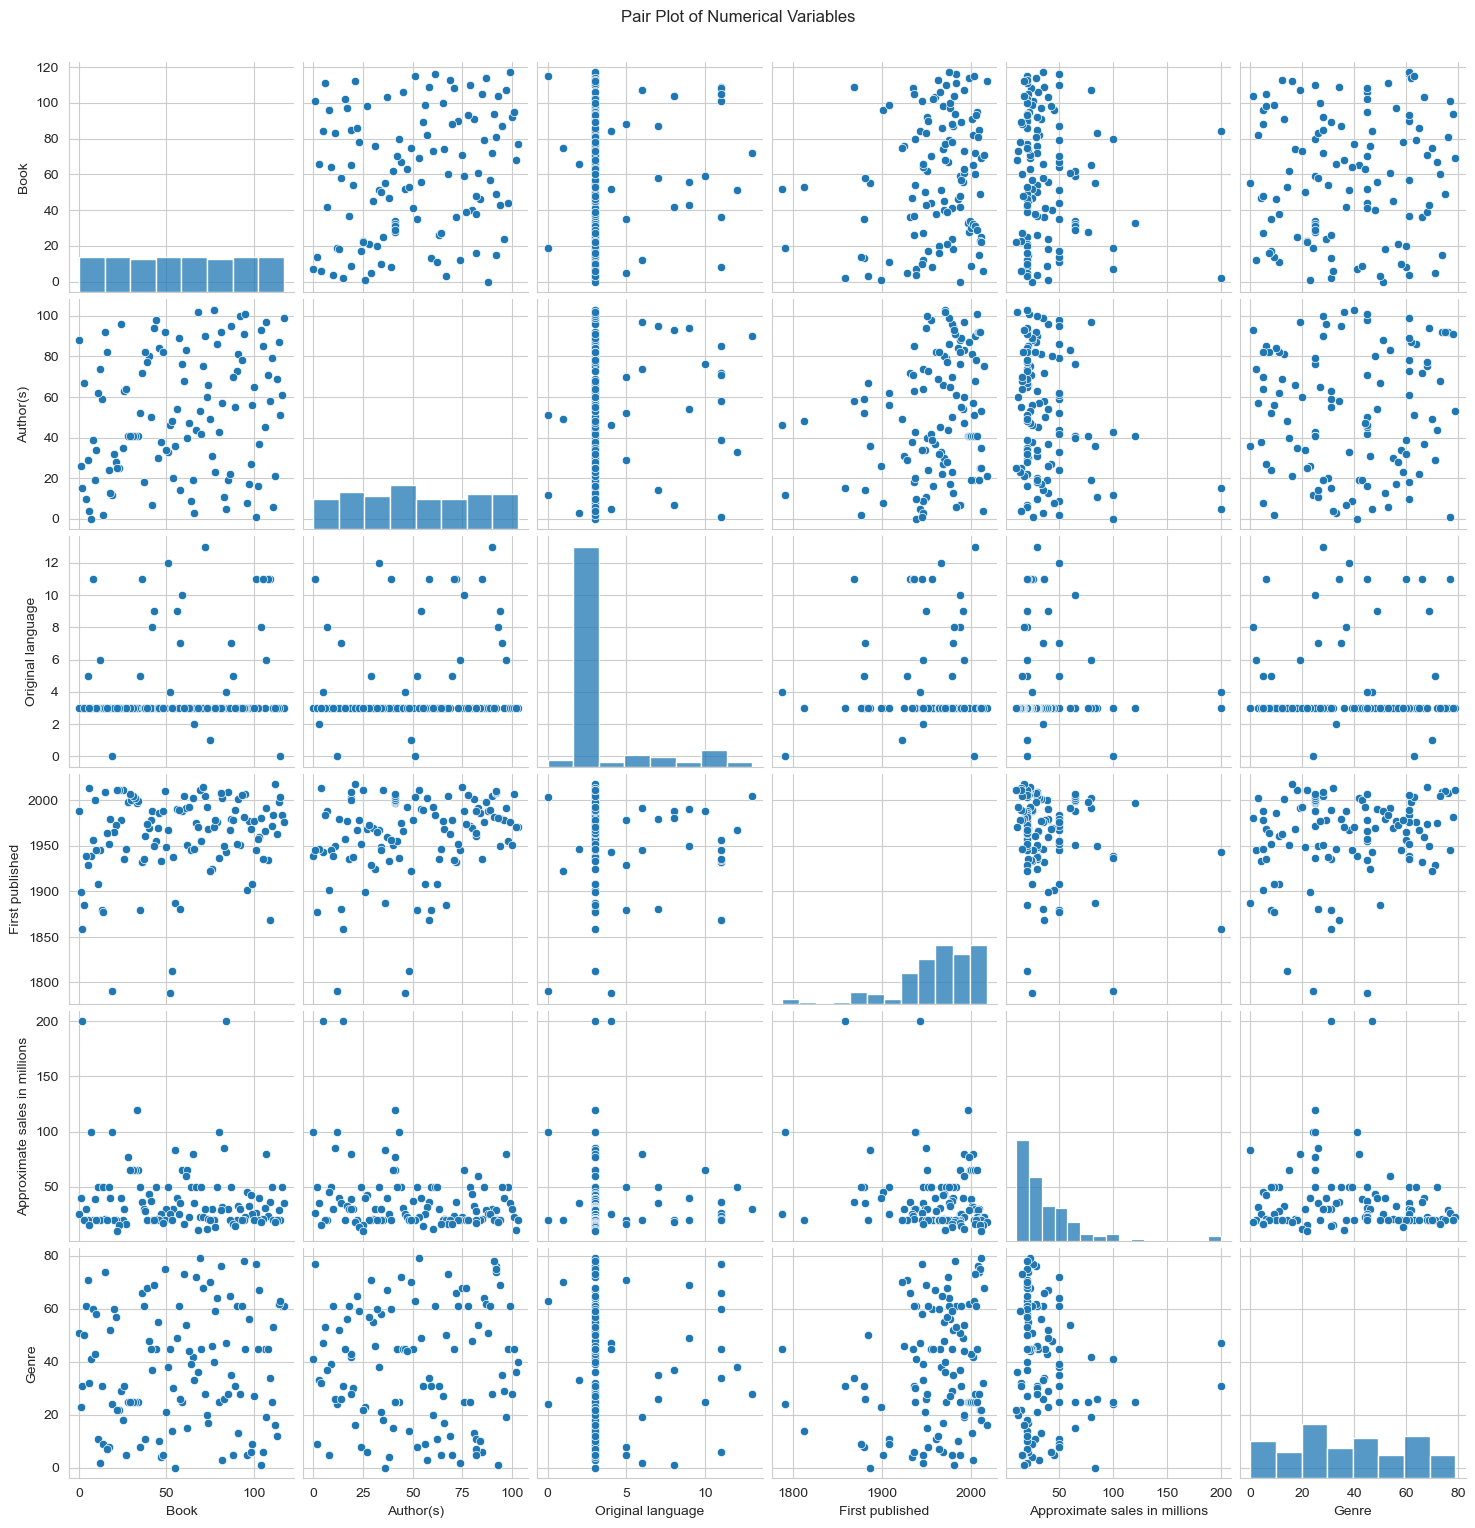

In [281]:
# Pair plot for numerical variables
pair_plot  = sns.pairplot(books)
# suptitle function from Matplotlib to place the title of the pair plot in a corner
pair_plot.fig.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

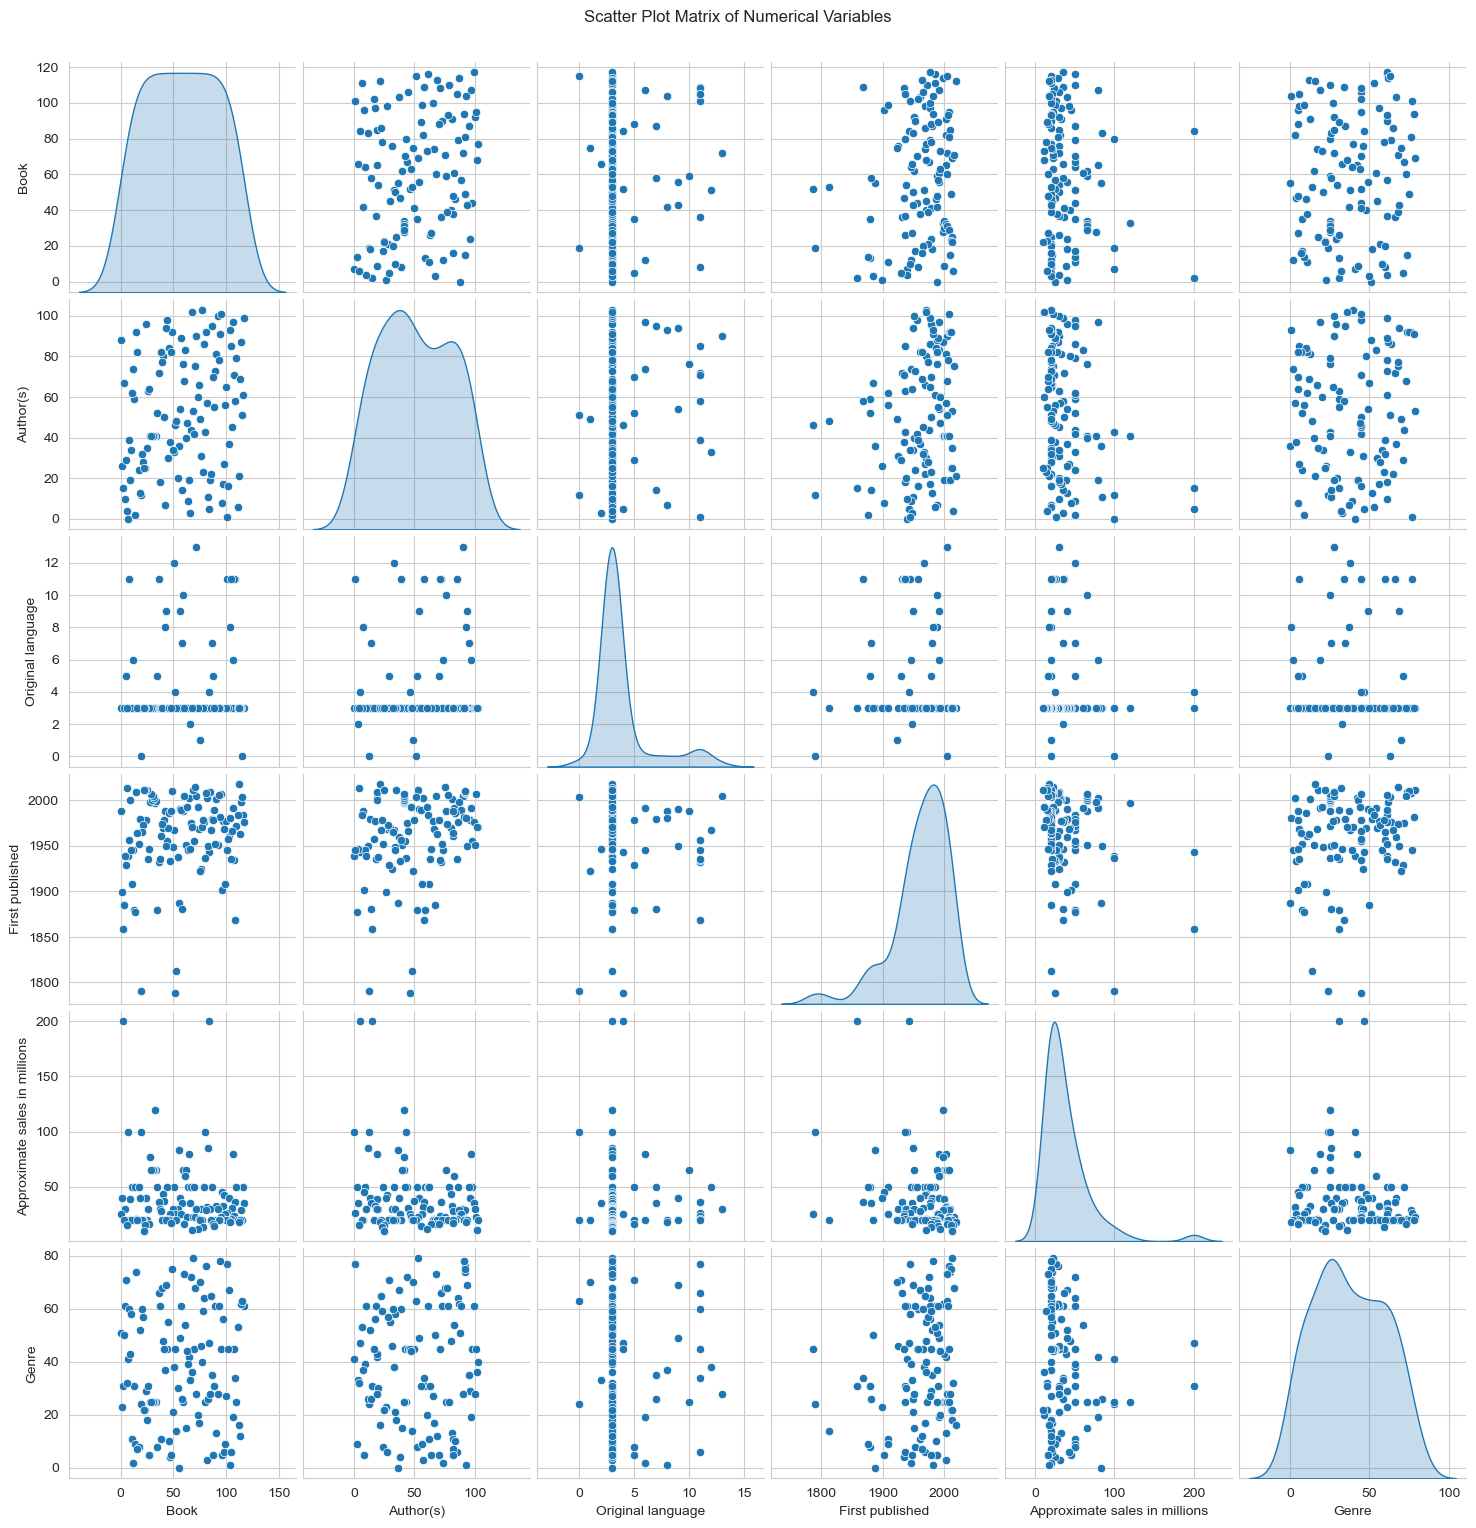

In [282]:
'''display scatter plots for pairs of numerical variables with KDE plots along the diagonal,
providing additional insights into the distribution of each numerical variable.'''

pair_plot = sns.pairplot(books, diag_kind='kde')
pair_plot.fig.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

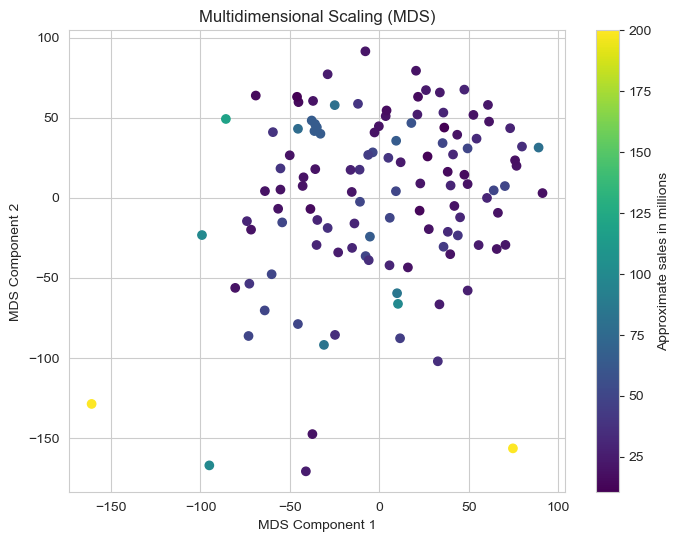

In [283]:
'''Multidimensional scaling is a dimensionality reduction technique
that visualizes the similarity or dissimilarity between data points in a lower-dimensional space.
The colors of the points represent different categories of the 'Approximate sales in millions' variable, providing insights into how the data is distributed in the reduced space.'''

# Perform MDS to visualize high-dimensional data in 2D
mds = MDS(n_components=2)

# transform the data into a two-dimensional space
mds_data = mds.fit_transform(books)

# Plot MDS results
plt.figure(figsize=(8, 6))
plt.scatter(mds_data[:, 0], mds_data[:, 1], c=books['Approximate sales in millions'], cmap='viridis')
plt.title('Multidimensional Scaling (MDS)')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='Approximate sales in millions')
plt.show()

Outliers

"We observed the outliers, but we didn't define them precisely"

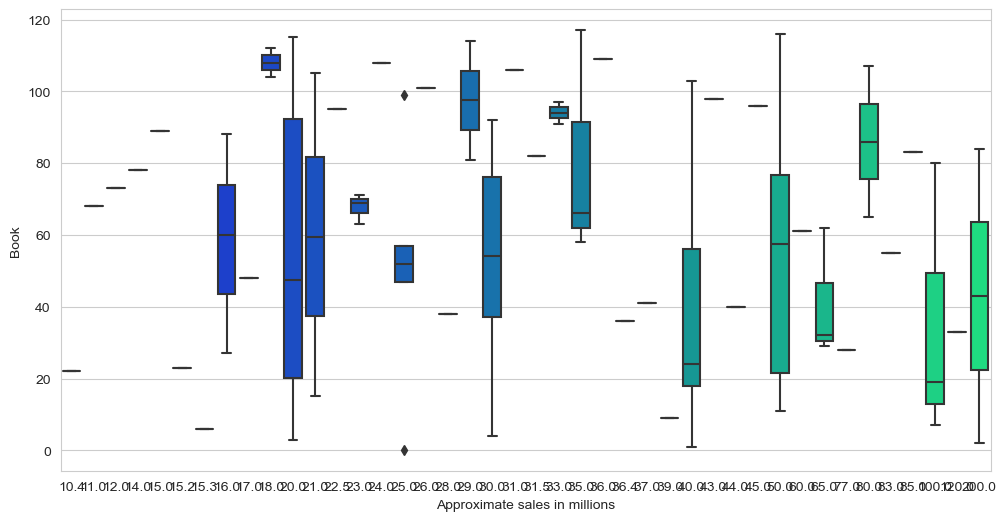

<Figure size 640x480 with 0 Axes>

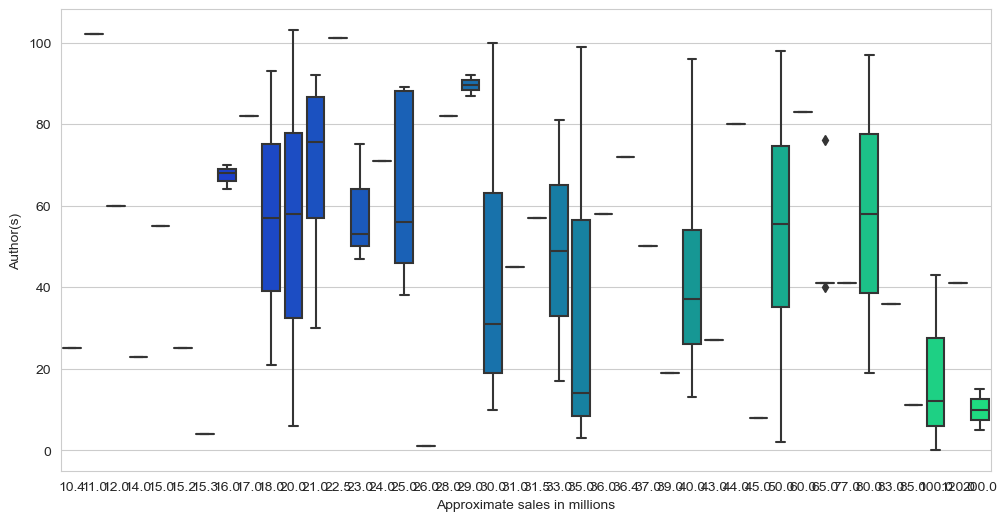

<Figure size 640x480 with 0 Axes>

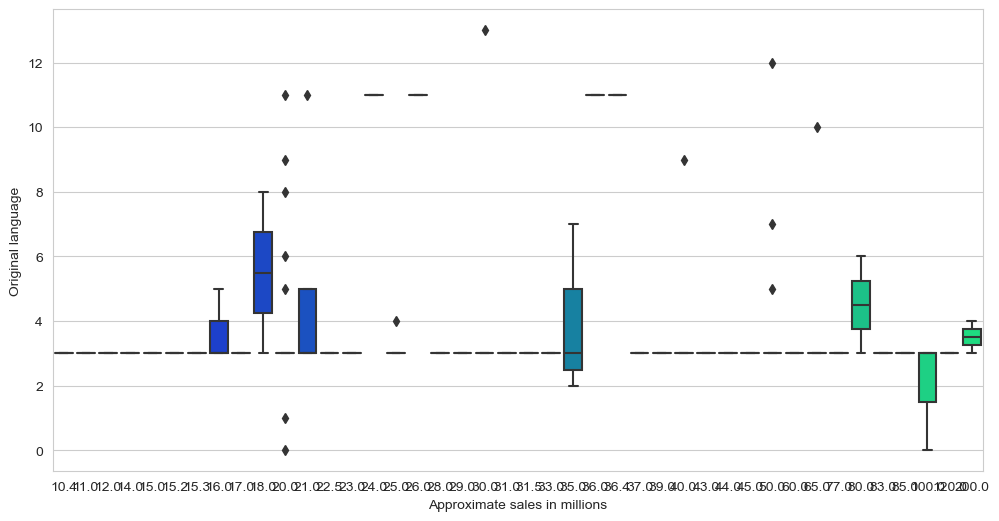

<Figure size 640x480 with 0 Axes>

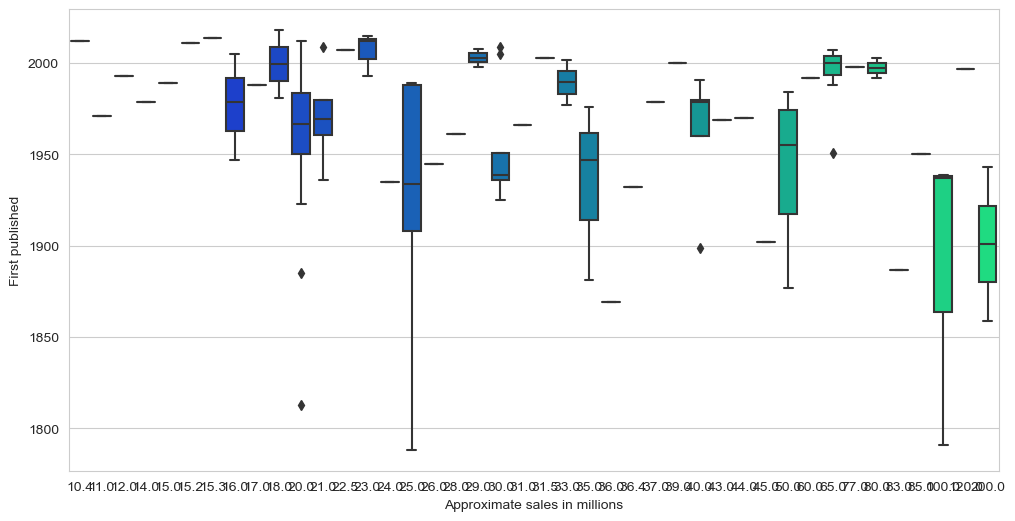

<Figure size 640x480 with 0 Axes>

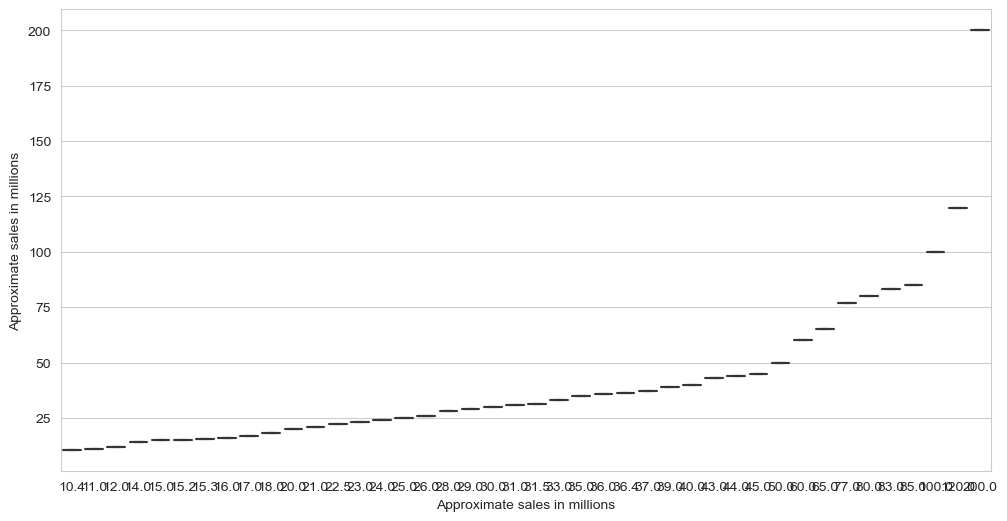

<Figure size 640x480 with 0 Axes>

In [284]:
# generate a series of boxplots, one for each column in the dataset to visualize potential outliers
for i in range(len(columns)-1):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Approximate sales in millions',y=columns[i], data=books, palette='winter')
    plt.figure()

'''We observed the outliers, but we didn't define them precisely'''

In [285]:
# we want to identify outliers with accurate numbers instead of depending on our observation
'''outliers are identified using IQR by checking which data points
fall below the lower bound or above the upper bound'''

outliers_before_removal = {}
for column in books:
    Q1 = books[column].quantile(0.25)
    Q3 = books[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each column
    outliers = books[(books[column] < lower_bound) | (books[column] > upper_bound)]
    outliers_before_removal[column] = outliers

# Display the outliers found before removal for each column
for column, outliers in outliers_before_removal.items():
    print(f"Column '{column}' has {len(outliers)} outliers before removal.")

Column 'Book' has 0 outliers before removal.
Column 'Author(s)' has 0 outliers before removal.
Column 'Original language' has 26 outliers before removal.
Column 'First published' has 5 outliers before removal.
Column 'Approximate sales in millions' has 6 outliers before removal.
Column 'Genre' has 0 outliers before removal.


In [286]:
# Printing outliers found for 'First published'' before removal
print("\nOutliers found for 'First published' before removal:")
print(outliers_before_removal['First published'])


Outliers found for 'First published' before removal:
    Book  Author(s)  Original language  First published  \
0      2         15                  3             1859   
4     19         12                  0             1791   
44   109         58                 11             1869   
66    52         46                  4             1788   
96    53         48                  3             1813   

    Approximate sales in millions  Genre  
0                           200.0     31  
4                           100.0     24  
44                           36.0     34  
66                           25.0     45  
96                           20.0     14  


Handling outliers with IQR method

In [287]:
def handle_outliers_iqr(data, columns):
    outliers_indices = []
    for column_name in columns:
        Q1 = books[column_name].quantile(0.25)
        Q3 = books[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers for the current column
        outliers = books[(books[column_name] < lower_bound) | (books[column_name] > upper_bound)]
        outliers_indices.extend(outliers.index.tolist())

        # Handle outliers by capping them to the threshold values
        books[column_name] = np.where(books[column_name] < lower_bound, lower_bound, books[column_name])
        books[column_name] = np.where(books[column_name] > upper_bound, upper_bound, books[column_name])

    # Return the updated DataFrame without outliers and a list of outlier indices
    return books.drop(outliers_indices), outliers_indices

#  handling outliers using the function
# 'cleaned_data' --> contains the DataFrame with outliers handled
# 'outlier_indices' --> holds indices of removed outliers
cleaned_data, outlier_indices = handle_outliers_iqr(books.copy(), books)

In [288]:
# Accessing outliers for columns
lower_upper_bounds = {}  # Dictionary to store lower and upper bounds for columns
for column in books:
    lower_upper_bounds[column] = (cleaned_data[column].quantile(0.25) - 1.5 * (cleaned_data[column].quantile(0.75) - cleaned_data[column].quantile(0.25)),
                                  cleaned_data[column].quantile(0.75) + 1.5 * (cleaned_data[column].quantile(0.75) - cleaned_data[column].quantile(0.25)))

In [289]:
# Printing lower and upper bounds for 'Book'
print("Lower bound for Book:", lower_upper_bounds['Book'][0])
print("Upper bound for Book:", lower_upper_bounds['Book'][1])

Lower bound for Book: -62.5
Upper bound for Book: 177.5


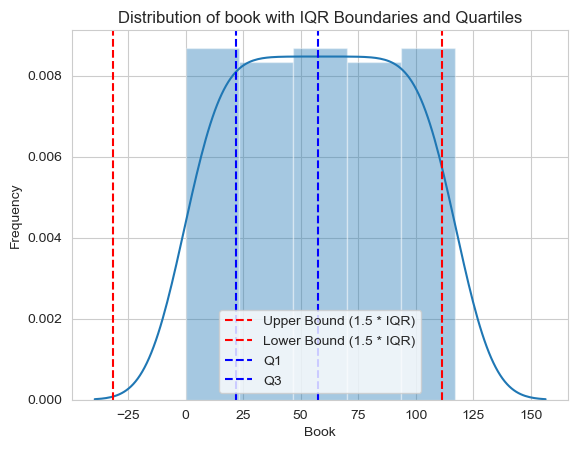

In [290]:
# plot target distribution with outlier boundaries and quartiles
sns.distplot(books['Book'])
# axvline --> adds a vertical line at specific position
plt.axvline(upper_bound, color='r', linestyle='--', label='Upper Bound (1.5 * IQR)')
plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound (1.5 * IQR)')
plt.axvline(Q1, color='b', linestyle='--', label='Q1')
plt.axvline(Q3, color='b', linestyle='--', label='Q3')

plt.xlabel('Book')
plt.ylabel('Frequency')
plt.title('Distribution of book with IQR Boundaries and Quartiles')
plt.legend()
plt.show()

In [291]:
# check for outliers after removal for each column
outliers_after_removal = {}
for column in books:
    # 'lower_upper_bounds' contains the lower and upper bounds for each column after outlier removal
    outliers_after_removal[column] = cleaned_data[(cleaned_data[column] < lower_upper_bounds[column][0]) | (cleaned_data[column] > lower_upper_bounds[column][1])]

# display the outliers found after removal for each column
for column, outliers in outliers_after_removal.items():
    print(f"Column '{column}' has {len(outliers)} outliers after removal.")

Column 'Book' has 0 outliers after removal.
Column 'Author(s)' has 0 outliers after removal.
Column 'Original language' has 0 outliers after removal.
Column 'First published' has 2 outliers after removal.
Column 'Approximate sales in millions' has 0 outliers after removal.
Column 'Genre' has 0 outliers after removal.


In [292]:
# Printing outliers found for 'First published' after removal
print("\nOutliers found for 'First published' after removal:")
print(outliers_after_removal['First published'])


Outliers found for 'First published' after removal:
    Book  Author(s)  Original language  First published  \
19  13.0       59.0                3.0           1880.0   
26  14.0        2.0                3.0           1877.0   

    Approximate sales in millions  Genre  
19                           50.0   31.0  
26                           50.0    9.0  


Scaling the numerical features

In [293]:
# initialize the MinMaxScaler
MS = MinMaxScaler()
# fit the scaler on the features and transform them
scaled_features = MS.fit_transform(cleaned_data)
scaled_features

# create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=cleaned_data.columns)

In [294]:
# display the updated DataFrame with scaled features
scaled_data.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,0.709402,0.089109,0.0,0.517730,1.000000,0.329114
1,0.470085,0.336634,0.0,0.070922,0.973190,0.000000
2,0.555556,0.168317,0.0,0.893617,0.932976,0.531646
3,0.239316,0.386139,0.0,0.858156,0.892761,0.316456
4,0.290598,0.386139,0.0,0.865248,0.731903,0.316456
